## EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

### Q1

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Import image
ew = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert ew is not None

256


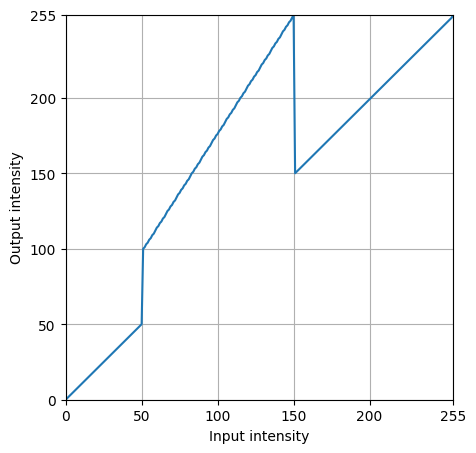

In [21]:
#Define Transformation Function
t1 = np.linspace(0, 50, 51).astype('uint8')
t2 = np.linspace(100, 255, 100).astype('uint8')
t3 = np.linspace(150, 255, 105).astype('uint8')

transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(transform))

# Plot the figure
plt.figure(figsize=(5, 5))
plt.plot(transform)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.xticks([0, 50, 100, 150, 200, 255])
plt.ylim(0, 255)
plt.yticks([0, 50, 100, 150, 200, 255])
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


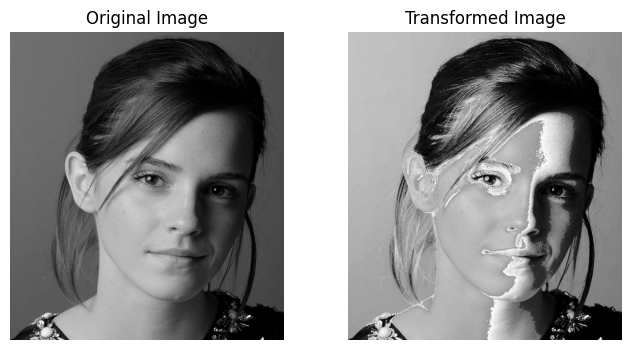

In [25]:
# Implement the transformation
ew_transformed = transform[ew]

# Plot the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(ew, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(ew_transformed, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis('off')
plt.show()

### Q2

### Approach 1

256


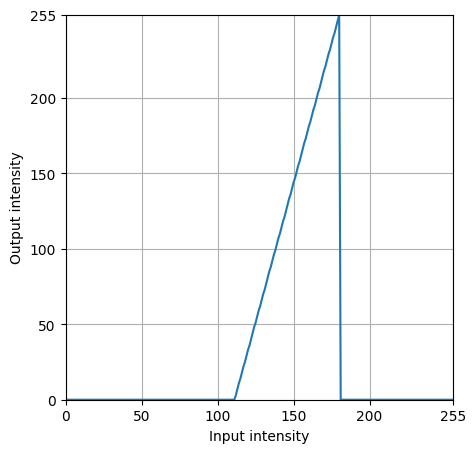

In [76]:
#Define Transformation Function
t1 = np.linspace(0, 0, 111).astype('uint8')
t2 = np.linspace(0, 255, 70).astype('uint8')
t3 = np.linspace(0, 0, 75).astype('uint8')

transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(transform))

# Plot the figure
plt.figure(figsize=(5, 5))
plt.plot(transform)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.xticks([0, 50, 100, 150, 200, 255])
plt.ylim(0, 255)
plt.yticks([0, 50, 100, 150, 200, 255])
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


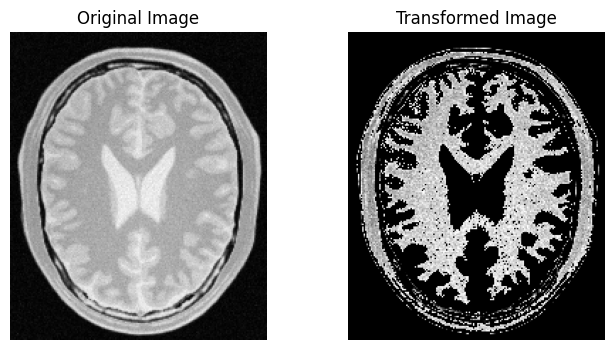

In [77]:
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

# Implement the transformation
transformed_brain = transform[brain]

# Plot the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(transformed_brain, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis('off')
plt.show()  

### Approach 2

256


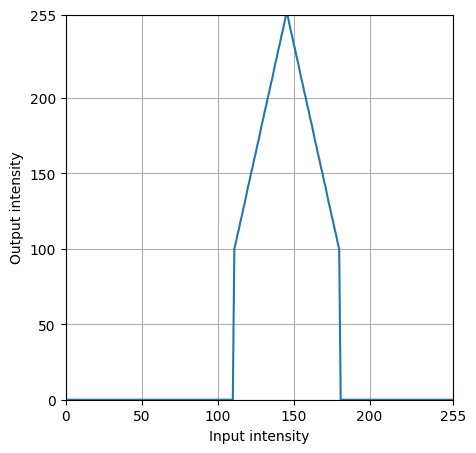

In [80]:
#Define Transformation Function
t1 = np.linspace(0, 0, 111).astype('uint8')
t2 = np.linspace(100, 255, 35).astype('uint8')
t3 = np.linspace(255, 100, 35).astype('uint8')
t4 = np.linspace(0, 0, 75).astype('uint8')

transform1 = np.concatenate((t1, t2, t3, t4), axis=0).astype('uint8')
print(len(transform))

# Plot the figure
plt.figure(figsize=(5, 5))
plt.plot(transform1)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.xticks([0, 50, 100, 150, 200, 255])
plt.ylim(0, 255)
plt.yticks([0, 50, 100, 150, 200, 255])
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

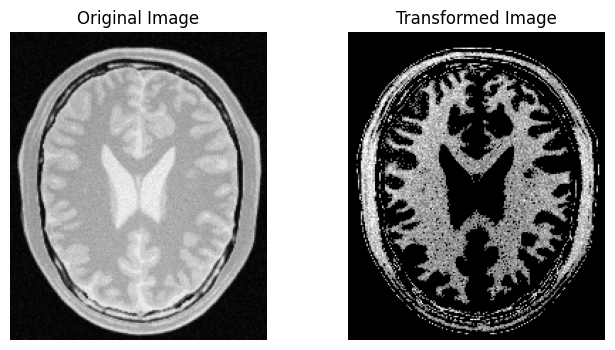

In [81]:
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

# Implement the transformation
transformed_brain = transform1[brain]

# Plot the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(brain, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(transformed_brain, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis('off')
plt.show()  

### Q3

In [82]:
# Load the image
img = cv.imread('a1images/highlights_and_shadows.jpg')
assert img is not None

# Convert to Lab color space
img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)


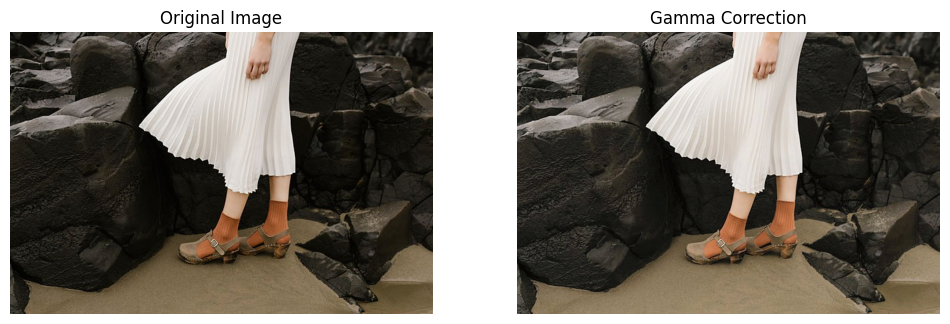

In [88]:
# split the Lab channels
L, a, b = cv.split(img_lab)

# Gamma correction
gamma = 0.8
t = np.array([(i/255.0)**(gamma)*255 for i in range(256)], dtype='uint8')

# Apply the transformation to the L channel
L_corrected = t[L]

# Merge the corrected L channel with the original a and b channels
img_lab_corrected = cv.merge((L_corrected, a, b))

# Plot the original and corrected images
fig, ax = plt.subplots(1, 2, figsize= (12, 8))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(img_lab_corrected, cv.COLOR_Lab2RGB))
ax[1].set_title('Gamma Correction')
for a in ax:
    a.axis('off')

plt.show()


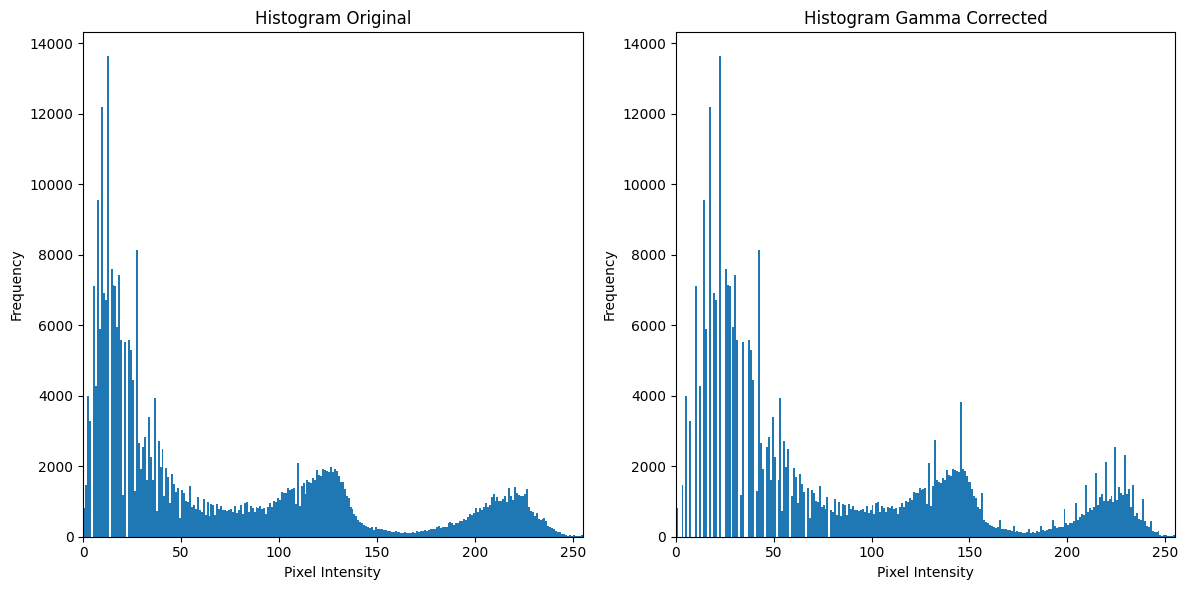

In [ ]:
# calculate the histogram of the original image
hist_original, bins = np.histogram(L.ravel(), 256, [0,256])
# calculate the histogram of the corrected image
hist_gamma_corrected, bins = np.histogram(L_corrected.ravel(), 256, [0,256])

bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(12, 6))

# Original histogram
plt.subplot(1, 2, 1)
plt.bar(bin_centers, hist_original, width=1.0)
plt.title("Histogram Original")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim(0, 255)

# Gamma corrected histogram
plt.subplot(1, 2, 2)
plt.bar(bin_centers, hist_gamma_corrected, width=1.0)
plt.title("Histogram Gamma Corrected")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

### Q4

In [106]:
# Load the image
spider = cv.imread('a1images/spider.png')
assert spider is not None

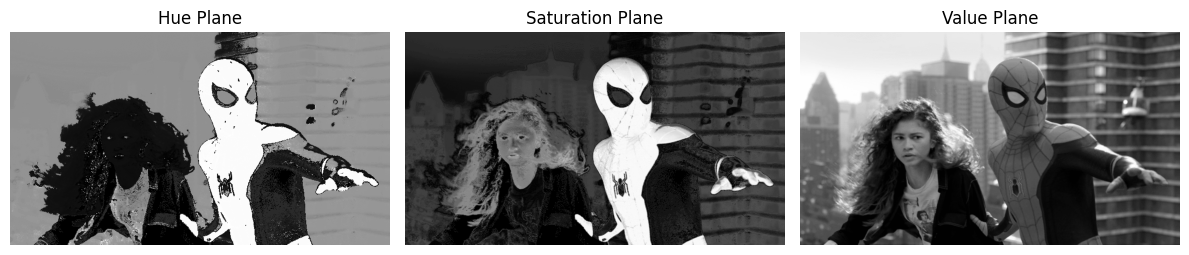

In [111]:
spider_rgb = cv.cvtColor(spider, cv.COLOR_BGR2RGB)
# Convert to HSV color space
spider_hsv = cv.cvtColor(spider, cv.COLOR_BGR2HSV)

# Split the HSV planes
h, s, v = cv.split(spider_hsv)

# Display the HSV channels
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(h, cmap='grey')
ax[0].set_title('Hue Plane')
ax[1].imshow(s, cmap='grey')
ax[1].set_title('Saturation Plane')
ax[2].imshow(v, cmap='grey')
ax[2].set_title('Value Plane')
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()